In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df = pd.read_csv('./cancer_patient.csv')
#df.drop('index', 'Patient Id', axis=1, inplace=True)
df.drop(['index', 'Patient Id'], axis=1, inplace=True)
df.sample(15)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
206,26,1,6,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
898,48,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
543,29,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
823,28,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
122,64,1,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
136,65,1,6,8,7,7,7,6,2,4,...,2,7,6,5,1,9,3,4,2,Medium
680,27,2,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,Low
653,19,1,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
376,17,2,1,2,3,4,4,3,2,1,...,1,3,3,2,1,3,2,1,1,Low
230,35,1,4,5,6,5,6,5,5,5,...,1,4,3,2,4,6,2,4,1,Medium


In [3]:
df = df.drop(['Level'], axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [4]:
normalized = normalize(df)
normalized[:3]

array([[0.91915231, 0.0278531 , 0.0557062 , 0.1114124 , 0.1392655 ,
        0.1114124 , 0.0835593 , 0.0557062 , 0.0557062 , 0.1114124 ,
        0.0835593 , 0.0557062 , 0.0557062 , 0.1114124 , 0.0835593 ,
        0.1114124 , 0.0557062 , 0.0557062 , 0.0835593 , 0.0278531 ,
        0.0557062 , 0.0835593 , 0.1114124 ],
       [0.68718427, 0.0404226 , 0.12126781, 0.0404226 , 0.20211302,
        0.12126781, 0.16169042, 0.08084521, 0.08084521, 0.08084521,
        0.08084521, 0.16169042, 0.08084521, 0.12126781, 0.0404226 ,
        0.12126781, 0.28295823, 0.32338083, 0.24253563, 0.08084521,
        0.0404226 , 0.28295823, 0.08084521],
       [0.81351363, 0.02324325, 0.09297299, 0.11621623, 0.13945948,
        0.11621623, 0.11621623, 0.09297299, 0.13945948, 0.16270273,
        0.04648649, 0.06972974, 0.09297299, 0.18594597, 0.18594597,
        0.16270273, 0.20918922, 0.04648649, 0.02324325, 0.09297299,
        0.13945948, 0.16270273, 0.04648649]])

In [5]:
df2 = pd.DataFrame(normalized)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.919152,0.027853,0.055706,0.111412,0.139266,0.111412,0.083559,0.055706,0.055706,0.111412,...,0.111412,0.083559,0.111412,0.055706,0.055706,0.083559,0.027853,0.055706,0.083559,0.111412
1,0.687184,0.040423,0.121268,0.040423,0.202113,0.121268,0.161690,0.080845,0.080845,0.080845,...,0.121268,0.040423,0.121268,0.282958,0.323381,0.242536,0.080845,0.040423,0.282958,0.080845
2,0.813514,0.023243,0.092973,0.116216,0.139459,0.116216,0.116216,0.092973,0.139459,0.162703,...,0.185946,0.185946,0.162703,0.209189,0.046486,0.023243,0.092973,0.139459,0.162703,0.046486
3,0.799638,0.021612,0.151283,0.151283,0.151283,0.151283,0.129671,0.151283,0.151283,0.151283,...,0.172895,0.086447,0.043224,0.064836,0.021612,0.086447,0.108059,0.129671,0.151283,0.108059
4,0.866230,0.018831,0.112987,0.150649,0.131818,0.131818,0.131818,0.112987,0.131818,0.131818,...,0.169480,0.056493,0.037662,0.075324,0.018831,0.075324,0.037662,0.075324,0.037662,0.056493


In [6]:
df2.columns = df.columns
df2.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0.919152,0.027853,0.055706,0.111412,0.139266,0.111412,0.083559,0.055706,0.055706,0.111412,...,0.111412,0.083559,0.111412,0.055706,0.055706,0.083559,0.027853,0.055706,0.083559,0.111412
1,0.687184,0.040423,0.121268,0.040423,0.202113,0.121268,0.161690,0.080845,0.080845,0.080845,...,0.121268,0.040423,0.121268,0.282958,0.323381,0.242536,0.080845,0.040423,0.282958,0.080845
2,0.813514,0.023243,0.092973,0.116216,0.139459,0.116216,0.116216,0.092973,0.139459,0.162703,...,0.185946,0.185946,0.162703,0.209189,0.046486,0.023243,0.092973,0.139459,0.162703,0.046486
3,0.799638,0.021612,0.151283,0.151283,0.151283,0.151283,0.129671,0.151283,0.151283,0.151283,...,0.172895,0.086447,0.043224,0.064836,0.021612,0.086447,0.108059,0.129671,0.151283,0.108059
4,0.866230,0.018831,0.112987,0.150649,0.131818,0.131818,0.131818,0.112987,0.131818,0.131818,...,0.169480,0.056493,0.037662,0.075324,0.018831,0.075324,0.037662,0.075324,0.037662,0.056493


In [7]:
# Perform hierarchical clustering
mergings = linkage(normalized, method='ward')

In [8]:
mergings[:5]

array([[  0.,  33.,   0.,   2.],
       [  1.,  16.,   0.,   2.],
       [  2.,   5.,   0.,   2.],
       [  3., 115.,   0.,   2.],
       [  4., 204.,   0.,   2.]])

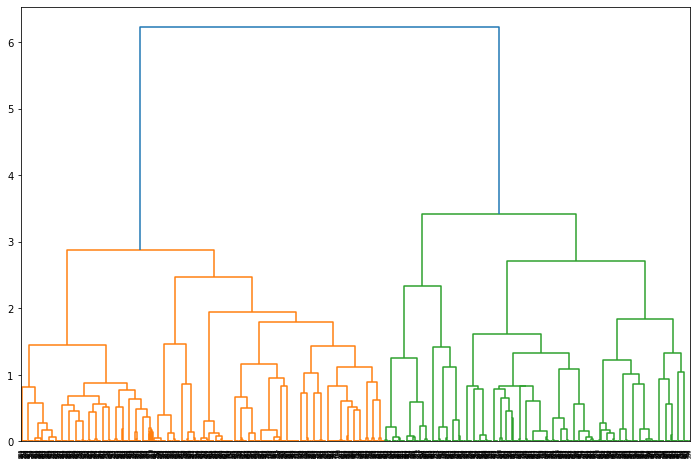

In [13]:
plt.figure(figsize=(12, 8))

dendrogram(mergings, leaf_rotation=90, leaf_font_size=5)
plt.savefig('./images/dendogram.png')
plt.show()

In [10]:
# Generate cluster labels with sklearn.cluster's AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

labels = cluster.fit_predict(df2)

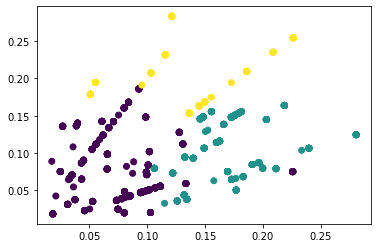

In [14]:
# Create a scatter plot with two of the features
plt.scatter(df2['Coughing of Blood'], df2['Shortness of Breath'], c=labels)
plt.savefig('./images/two_feature_scatterplot.png')
plt.show()

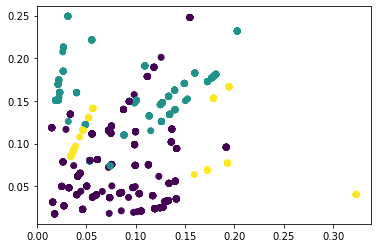

In [12]:
plt.scatter(df2['Wheezing'], df2['Alcohol use'], c=labels)
plt.show()